In [33]:
# import pandas as pd
# import numpy as np
# import warnings as wr
# import matplotlib.pyplot as plt
# import matplotlib.dates as dts
#!pip install kmodes
from kmodes.kprototypes import KPrototypes
wr.filterwarnings('ignore')

In [2]:
fm=pd.read_csv("E:\\OneDrive\\DS\Documents\\Internship\\Schbang\\Flipkart.csv",encoding='latin',error_bad_lines=False)

b'Skipping line 70: expected 15 fields, saw 16\nSkipping line 85: expected 15 fields, saw 16\nSkipping line 376: expected 15 fields, saw 16\nSkipping line 545: expected 15 fields, saw 16\nSkipping line 604: expected 15 fields, saw 16\nSkipping line 720: expected 15 fields, saw 16\nSkipping line 802: expected 15 fields, saw 16\nSkipping line 1102: expected 15 fields, saw 16\nSkipping line 1461: expected 15 fields, saw 16\nSkipping line 1482: expected 15 fields, saw 16\nSkipping line 1528: expected 15 fields, saw 16\nSkipping line 1573: expected 15 fields, saw 16\nSkipping line 1790: expected 15 fields, saw 16\nSkipping line 1837: expected 15 fields, saw 16\nSkipping line 2023: expected 15 fields, saw 16\nSkipping line 2055: expected 15 fields, saw 16\nSkipping line 2264: expected 15 fields, saw 16\nSkipping line 6159: expected 15 fields, saw 16\nSkipping line 6256: expected 15 fields, saw 16\nSkipping line 6413: expected 15 fields, saw 16\nSkipping line 7656: expected 15 fields, saw 16\

In [3]:
DeleteCols=["Uniq Id", "Image Url", "Url","Product Description","Combo Offers"]
fm=fm.drop(DeleteCols,axis=1)

In [15]:
fm.tail(n=5)

,Bb Category,Product Title,Brand,Quantity Or Pack Size,Mrp,Price,Site Name,Offers,Stock Availibility,Date,Time,Day
14930,Oral Care,"Closeup Ever Fresh ToothpasteÂ Â (300 g, Pack ...",Closeup,2x150 g,144,115,flipkart_com,Bank Offer 10% Cashback* on HDFC Bank Debit Ca...,True,2019-11-13,00:32:53,13
14931,Juices,Real Activ 100% Apple JuiceÂ Â (1 L),Real,1 L Tetrapack,130,100,flipkart_com,Bank Offer 5% Unlimited Cashback on Flipkart A...,True,2019-11-05,00:27:54,05
14932,Masalas & Spices,Satyam Chilly BedgiÂ Â (100 g),Satyam,100 g,49,40,flipkart_com,Bank Offer 10% Cashback* on HDFC Bank Debit Ca...,True,2019-11-21,00:23:53,21
14933,"Chips,Namkeen & Snacks",Haldiram's Classic Nut CrackerÂ Â (1 kg),Haldiram's,1 kg,225,222,flipkart_com,Bank Offer 5% Unlimited Cashback on Flipkart A...,True,2019-11-09,00:23:23,09
14934,Dairy,Mother Dairy Mango Sweet LassiÂ Â (200 ml),Mother Dairy,200 ml,20,20,flipkart_com,Bank Offer 5% Unlimited Cashback on Flipkart A...,True,2019-11-12,01:10:27,12


In [5]:
fm_new=fm["Crawl Timestamp"].str.split(" ",n=1,expand=True)
fm["Date"]=fm_new[0]
fm["Time"]=fm_new[1]
fm=fm.drop("Crawl Timestamp",axis=1)

fm_newer=fm["Time"].str.split(" ",n=1,expand=True)
fm["Time"]=fm_newer[0]
fm["Time_2"]=fm_newer[1]
fm=fm.drop("Time_2",axis=1)

In [6]:
#Defining function to extract day/month/year from date
def month(d,x):
    import datetime, calendar
    dt=datetime.datetime.strptime(d, '%Y-%m-%d')
    if(x=="y"):
        return dt.strftime("%Y")
    elif(x=="m"):
        return dt.strftime("%b")
    elif(x=="d"):
        return dt.strftime("%d")
    else:
        print("Please input y(year) or m(month) or d(day)")

In [7]:
#fm["Month"]=fm["Date"].apply(month,args=("m"))
fm["Day"]=fm["Date"].apply(month,args=("d"))
#fm["Year"]=fm["Date"].apply(month,args=("y"))

This data is for November,2019

In [8]:
fm["Day"][fm["Day"]=="23"]

7        23
23       23
40       23
49       23
52       23
         ..
14903    23
14911    23
14918    23
14919    23
14920    23
Name: Day, Length: 1689, dtype: object

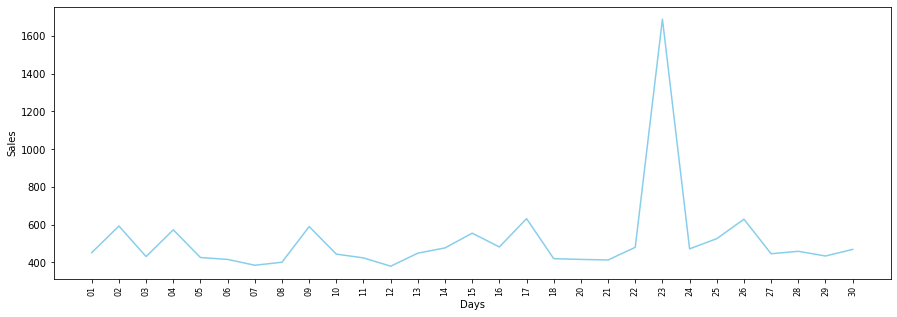

In [9]:
GD=fm.groupby('Day').size()
plt.figure(figsize=(15,5))
plt.plot(GD, color='skyblue')
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

In [10]:
fm['Offers'].mode()[0] #Bank Offer 10% Cashback* on HDFC Bank Debit Cards T&C | Bank Offer 5% Unlimited Cashback on Flipkart Axis Bank Credit Card T&C | Bank Offer Extra 5% off* with Axis Bank Buzz Credit Card T&C | No Cost EMI on Flipkart Axis Bank Credit Card T&C
fm['Offers'].fillna(value=fm['Offers'].mode()[0],axis=0,inplace=True)

In [14]:
#fm.isnull().sum()
#fm.dropna(inplace=True)

item1=69
item2=71
item3=70
avg.cart_val=Rs.70

To increase avg.cart value, item with higher price:
A)
item1=270
avg.cart_val=270
B)
item1=69
item2=142
item3=71
avg.cart_val=94

acv=1 (Incentivise Level-I)
acv=2 (Incentivise Level-II)
acv=3 (Incentivise Level-III)

/quantity increase/

In [33]:
# GD2=fm.groupby(["Bb Category"]).size()
# GD2=GD2.sort_values(ascending=False)
# GD2

Bb Category
Chocolates & Sweets           1480
Masalas & Spices              1316
Soaps & Body Wash              784
Chips,Namkeen & Snacks         644
Creams, Lotions, Skin Care     637
Hair Care                      620
Deos, Perfumes & Talc          570
Dairy                          490
Biscuits                       473
Dals & Pulses                  447
Juices                         444
Dry Fruits, Nuts & Seeds       373
Ready To Cook                  368
Rice & Rice Products           363
Repellants & Fresheners        352
Ghee & Oils                    344
Atta & Flours                  335
Oral Care                      319
Floor & Other Cleaners         312
Soft Drinks                    304
Noodles & Pasta                297
Ketchups & Spreads             286
Diapers & Wipes                252
Breakfast Cereals              242
Tea                            222
Pooja Needs                    194
Shaving Needs                  189
Wellness & Common Pharma       186
Paper & 

Text(0, 0.5, 'Total Sales')

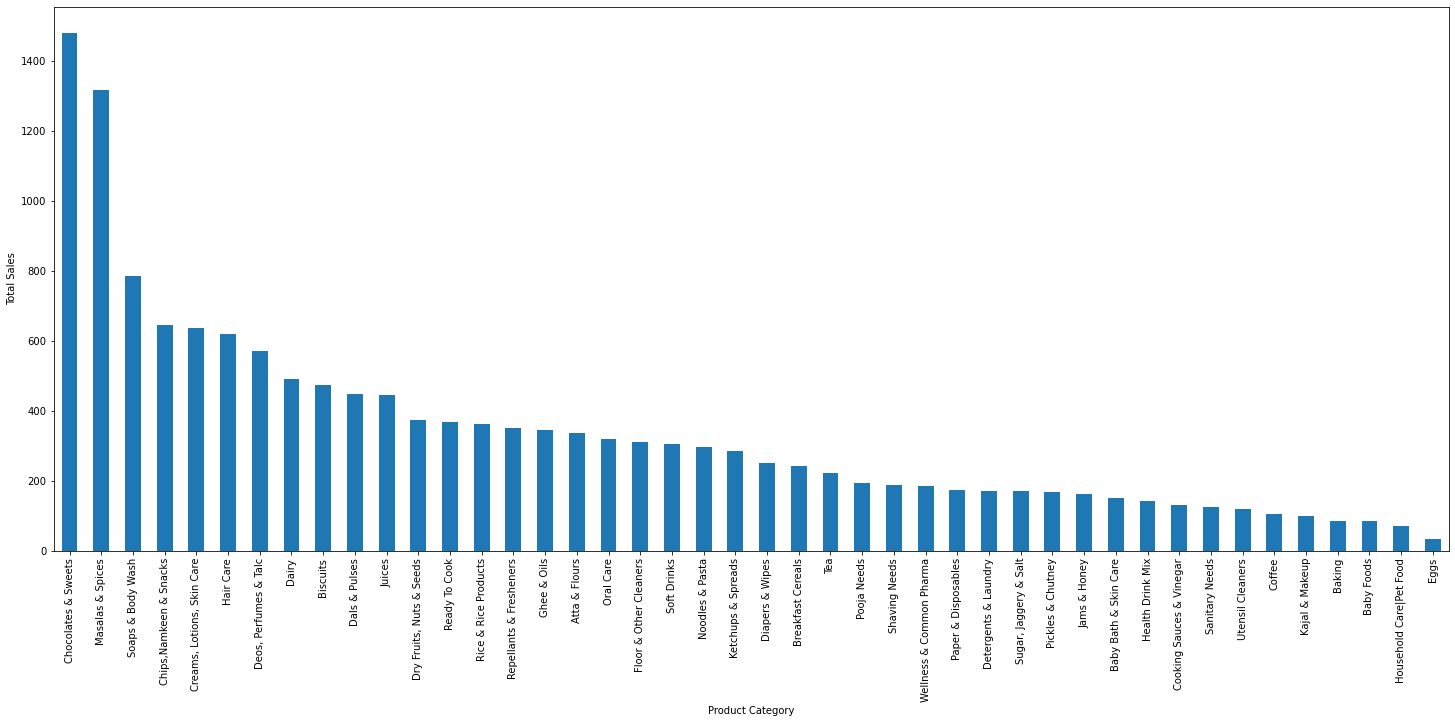

In [32]:
# GD2.plot(kind='bar',figsize=(25,10))
# plt.xlabel('Product Category')
# plt.ylabel('Total Sales')

In [74]:
#fm.to_csv("FlipkartPy.csv")

# Customer Segmentation

In [49]:
fk=pd.read_csv("E:\OneDrive\DS\Documents\Internship\Schbang\FlipkartPy.csv",encoding="latin-1")

In [50]:
JustPredictors=fk.drop(['Date','Time','Day'],axis=1)
JustPredictors.head()

,Bb Category,Product Title,Brand,Quantity Or Pack Size,Mrp,Price,Site Name,Offers,Stock Availibility
0,Juices,B Natural Dakshin Pink GuavaÃÂ ÃÂ (750 ml),B Natural,750 ml Plastic Bottle,99,95,flipkart_com,Bank Offer 5% Unlimited Cashback on Flipkart A...,True
1,Chocolates & Sweets,Parle Melody Chocolaty ToffeeÃÂ ÃÂ (195.5 g),Parle,195.5 g,50,50,flipkart_com,Bank Offer 10% Cashback* on HDFC Bank Debit Ca...,True
2,Household Care|Pet Food,Whiskas Adult (+1 year) Fish 3 kg Dry Cat Food,Whiskas,3 kg,800,680,flipkart_com,Bank Offer 5% Unlimited Cashback on Flipkart A...,True
3,"Creams, Lotions, Skin Care",Enchanteur Romantic Perfumed Body LotionÃÂ Ã...,Enchanteur,250 ml,220,182,flipkart_com,Bank Offer 10% Cashback* on HDFC Bank Debit Ca...,True
4,Hair Care,Pantene Hair Fall Control ShampooÃÂ ÃÂ (180 ml),Pantene,180 ml,115,112,flipkart_com,Bank Offer 10% Instant Discount on Federal Ban...,True


In [53]:
flip_array=JustPredictors.values

In [54]:
flip_array[:, 4] = flip_array[:, 4].astype(float)
flip_array[:, 5] = flip_array[:, 5].astype(float)

In [56]:
kproto=KPrototypes(n_clusters=3, verbose=2,max_iter=20)
clusters = kproto.fit_predict(flip_array, categorical=[0, 1, 2, 3, 6, 7, 8])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1174, ncost: 219715579.75299037
Run: 1, iteration: 2/20, moves: 898, ncost: 209213062.98757145
Run: 1, iteration: 3/20, moves: 656, ncost: 205198877.3419478
Run: 1, iteration: 4/20, moves: 333, ncost: 204188392.9774184
Run: 1, iteration: 5/20, moves: 199, ncost: 203909358.0582296
Run: 1, iteration: 6/20, moves: 138, ncost: 203784598.45275342
Run: 1, iteration: 7/20, moves: 64, ncost: 203744417.44973686
Run: 1, iteration: 8/20, moves: 22, ncost: 203716603.99993798
Run: 1, iteration: 9/20, moves: 33, ncost: 203612232.80349064
Run: 1, iteration: 10/20, moves: 58, ncost: 203538997.86398616
Run: 1, iteration: 11/20, moves: 101, ncost: 203443392.0154509
Run: 1, iteration: 12/20, moves: 61, ncost: 203407063.21140411
Run: 1, iteration: 13/20, moves: 42, ncost: 203333717.59154454
Run: 1, iteration: 14/20, moves: 72, ncost: 203265963.8596579
Run: 1, iteration: 15/20, moves: 63, ncost: 

In [59]:
kproto.cluster_centroids_

array([['799.0399449035813', '658.3250688705234', 'Diapers & Wipes',
        'Enfamil A Plus Stage 1 Infant FormulaÃ\x82Â\xa0Ã\x82Â\xa0(400 g, Upto 6 Months)',
        'Pampers', '400 g', 'flipkart_com',
        'Bank Offer 10% Cashback* on HDFC Bank Debit Cards T&C | Bank Offer 5% Unlimited Cashback on Flipkart Axis Bank Credit Card T&C | Bank Offer Extra 5% off* with Axis Bank Buzz Credit Card T&C | No Cost EMI on Flipkart Axis Bank Credit Card T&C',
        'True'],
       ['94.66004291445097', '84.02350965575147', 'Masalas & Spices',
        'Rani Float Fruit Drink with Real Fruit PiecesÃ\x82Â\xa0Ã\x82Â\xa0(240 ml)',
        'Flipkart Supermart Select', '100 g', 'flipkart_com',
        'Bank Offer 10% Cashback* on HDFC Bank Debit Cards T&C | Bank Offer 5% Unlimited Cashback on Flipkart Axis Bank Credit Card T&C | Bank Offer Extra 5% off* with Axis Bank Buzz Credit Card T&C | No Cost EMI on Flipkart Axis Bank Credit Card T&C',
        'True'],
       ['304.3976401179941', '269.26253

In [60]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [63]:
fk['Cluster']=cluster_dict

In [75]:
c1=fk[fk["Cluster"]==0]

In [76]:
c2=fk[fk["Cluster"]==1]

In [77]:
c3=fk[fk["Cluster"]==2]

In [83]:
c1['Bb Category'].nunique()

30

In [84]:
c1["Price"].sum()

477944

In [80]:
c2['Bb Category'].nunique()

44

In [85]:
c2["Price"].sum()

900648

In [81]:
c3['Bb Category'].nunique()

43

In [86]:
c3["Price"].sum()

912800

In [87]:
c3["Offers"].nunique()

118